# CST 4070 : Coursework 5
## NOSQL with MongoDB & PyMongo
### By: Sherif El Abd M00737821

## Task 1: Insert students.json into MongoDB

In [37]:
# importing the Mongo libraries to start connecting to my Mongo DB server
import json
from pymongo import MongoClient

#connecting to the Mongo DB running local host on port 27017
client = MongoClient('localhost', 27017)
db = client['SherifTask1'] #Assigning the database for the queries to be created
collection_students = db['Students'] #Assgining the correct collection to be created 
json_string = ""


#the following loop is to read in the json file one line at a time and write to the collection on Mongo
with open('students.json') as data_file:
    for record in data_file:
        data_json = json.loads(record)
        collection_students.insert_one(data_json)

client.close()

## Task 2: Query all students who recieved above 60

In [437]:
#Instatiate a Mongodb client and connect to the correct Database from Task one and the Students Collection 
# I renamed the Colelction Variable to SherifTask2Collection for the Coursework purposes

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["SherifTask1"]
SherifTask2Collection = mydb["Students"]

#Queried all students who recived above 60 in the 'Exam' score with the .0. index 
mydoc = SherifTask2Collection.find({"scores.0.score":{'$gt':60}},{"_id":1,"name":1})

for x in mydoc:
  print(x)



{'_id': 1, 'name': 'Aurelia Menendez'}
{'_id': 2, 'name': 'Corliss Zuk'}
{'_id': 3, 'name': 'Bao Ziglar'}
{'_id': 4, 'name': 'Zachary Langlais'}
{'_id': 7, 'name': 'Salena Olmos'}
{'_id': 9, 'name': 'Sanda Ryba'}
{'_id': 11, 'name': 'Marcus Blohm'}
{'_id': 13, 'name': 'Jessika Dagenais'}
{'_id': 15, 'name': 'Tambra Mercure'}
{'_id': 18, 'name': 'Verdell Sowinski'}
{'_id': 22, 'name': 'Margart Vitello'}
{'_id': 24, 'name': 'Jesusa Rickenbacker'}
{'_id': 25, 'name': 'Rudolph Domingo'}
{'_id': 32, 'name': 'Gwen Honig'}
{'_id': 33, 'name': 'Sadie Jernigan'}
{'_id': 36, 'name': 'Eugene Magdaleno'}
{'_id': 37, 'name': 'Meagan Oakes'}
{'_id': 40, 'name': 'Rachell Aman'}
{'_id': 44, 'name': 'Houston Valenti'}
{'_id': 47, 'name': 'Kurtis Jiles'}
{'_id': 49, 'name': 'Dinah Sauve'}
{'_id': 51, 'name': 'Elizabet Kleine'}
{'_id': 52, 'name': 'Tawana Oberg'}
{'_id': 54, 'name': 'Joel Rueter'}
{'_id': 55, 'name': 'Tresa Sinha'}
{'_id': 59, 'name': 'Vinnie Auerbach'}
{'_id': 64, 'name': 'Whitley Fears

## Task 3: Min Max score of last 5 students

In [387]:
#instantiate the Datbase variable and connect to the correct Datbase
mydb = myclient["SherifTask1"]

#Instatiate the Colelction variable and connect to the students collection
SherifTask3Collection = mydb["Students"]

#Used the aggregate methiode and the Project function to write the Student, Max and Min using the MAx and Min functions, limited to 5 records and ordered in descending order
mydoc = SherifTask3Collection.aggregate([{"$project":{"student": "$name", "Max": {"$max": "$scores.score"}, "Min":{"$min":"$scores.score"}}}, { "$sort" : { "_id" : -1} }, {"$limit": 5} ])
for x in mydoc:
  print(x)

{'_id': 199, 'student': 'Rae Kohout', 'Max': 82.11742562118049, 'Min': 28.86823689842918}
{'_id': 198, 'student': 'Timothy Harrod', 'Max': 64.85650354990375, 'Min': 11.9075674046519}
{'_id': 197, 'student': 'Tonisha Games', 'Max': 79.15856355963004, 'Min': 31.16287577231703}
{'_id': 196, 'student': 'Santiago Dollins', 'Max': 78.79257377604428, 'Min': 33.63300076481705}
{'_id': 195, 'student': 'Linnie Weigel', 'Max': 90.7775054046383, 'Min': 11.75008382913026}


## Task 4: Visualize the frequency distribution 

In [438]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from pymongo import MongoClient

#Instatiate the DB variable and the Colelction variable and connect to the correct DB and Collection  

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["SherifTask1"]
SherifTask4Collection = mydb["Students"]

# USed the aggregate function to unwind the deep json scores 
cursor = SherifTask3Collection.aggregate([
#   // First Stage used unwind to open the scores 
  { "$unwind": "$scores" },

#   // Second Stage used the group function to group by ID and write the name and compute the Average score
  {
    "$group":
      {
        "_id": "$_id",
        "name": { "$first": "$name"},
        "averageScore":
          {
            "$avg": "$scores.score"
          }
        
      }
  },
   {"$sort":{"_id": 1}} 
])


# Expanded the cursor and wrote to Pandas Dataframe
df =  pd.DataFrame(list(cursor))
df.head()



,_id,name,averageScore
0,0,aimee Zank,16.373316
1,1,Aurelia Menendez,61.539897
2,2,Corliss Zuk,46.538690
3,3,Bao Ziglar,46.235708
4,4,Zachary Langlais,67.798788


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5cf185290>]],
      dtype=object)

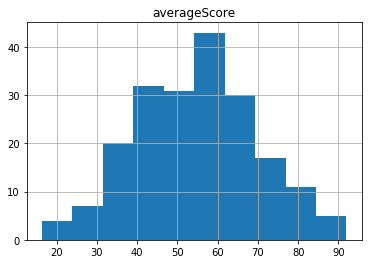

In [413]:
df.hist(column='averageScore')


In [440]:
cursor = SherifTask3Collection.aggregate([
#   // First Stage
  { "$unwind": "$scores" },

#   // Second Stage
  {
    "$group":
      {
        "_id": "$name",
        "Id": { "$first": "$_id"},
        "averageScore":
          {
            "$avg": "$scores.score"
          }
        
      }
  },
   {"$sort":{"_id": -1}} 
])

# Expand the cursor and construct the DataFrame
df =  pd.DataFrame(list(cursor))
df.shape

(114, 3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5ce6af150>]],
      dtype=object)

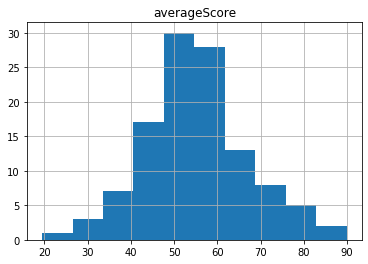

In [436]:
df.hist(column='averageScore')

## Task 5 Write to csv 

In [427]:

myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["SherifTask1"]
SherifTask4Collection = mydb["Students"]

# Make a query to the specific DB and Collection
cursor = SherifTask3Collection.aggregate([
#   // First Stage
  { "$unwind": "$scores" },

#   // Second Stage
  {
    "$group":
      {
        "_id": "$_id",
        "name": { "$first": "$name"},
        "averageScore":
          {
            "$avg": "$scores.score"
          }
        
      }
  },
   {"$sort":{"_id": 1}} 
])

# Expand the cursor and construct the DataFrame
df =  pd.DataFrame(list(cursor))
df.to_csv("SherifTask5.csv", ",",index=0)